# NFL Big Data Bowl 2021

## Exploratory Data Analysis

Author: Matthew B. Burrell

# Table of Contents

1. [Problem Statement](#Problem-Statement)
2. [Player Data](#Player-data)
    1. [Data Cleaning](#Data-Cleaning)
    2. [Player Height](#Player-Height)
    3. [Player Weight](#Player-Weight)
    4. [Player's Postion](#Player's-Postion)
    5. [Player's Age](#Player's-Age)
    5. [Defensive Players](#Defenisive-players)
        1. [Corner Backs](#Corner-backs)
        2. [Outside Line Backer](#Outside-Line-Backer)
        3. [Free Safety](#Free-Safety)
        4. [Strong Safety](#Strong-Safety)
        5. [Line Backer](#Line-Backer)
        6. [Inside line backer](#Inside-line-backer)
        7. [Defensive end](#Defensive-end)
        8. [Defensive back](#Defensive-back)
        9. [Middle Line Backer](#Middle-Line-Backer)
        10. [Defenive tackle](#Defenive-tackle)
        11. [Nose tackle](#Nose-tackle)
    6.[Offensive Players](#Offensive-Players)
        1. [Wide Recievers](#Wide-Recievers)
        2. [Running backs](#Running-backs)
        3. [Tight Ends](#Tight-End)
        4. [Quarter Backs](#Quarter-Back)
        5. [Full Backs](#Full-Back)
        6. [Punters](#Punter)
        7. [Kickers](#Kicker)
        8. [Half Backs](#Half-Back)
3. [Games Data](#Games-Data)
    1. [Week 1](#Week-1)
    2. [Week 2](#Week-2)
    3. [Week 3](#Week-3)
    4. [Week 4](#Week-4)
    5. [Week 5](#Week-5)
    6. [Week 6](#Week-6)
    7. [Week 7](#Week-7)
    8. [Week 8](#Week-8)
    9. [Week 9](#Week-9)
    10. [Week 10](#Week-10)
    11. [Week 11](#Week-11)
    12. [Week 12](#Week-12)
    13. [Week 13](#Week-13)
    14. [Week 14](#Week-14)
    15. [Week 15](#Week-15)
    16. [Week 16](#Week-16)
    17. [Week 17](#Week-17)
4. [Plays Data](#Plays-Data)
5. [Tracking Data](#Tracking-Data)
    1. [Week 1 Data](#Week-1-Data)
    2. [Week 2 Data](#Week-2-Data)
    3. [Week 3 Data](#Week-3-Data)
    4. [Week 4 Data](#Week-4-Data)
    5. [Week 5 Data](#Week-5-Data)
    6. [Week 6 Data](#Week-6-Data)
    7. [Week 7 Data](#Week-7-Data)
    8. [Week 8 Data](#Week-8-Data)
    9. [Week 9 Data](#Week-9-Data)
    10. [Week 10 Data](#Week-10-Data)
    11. [Week 11 Data](#Week-11-Data)
    12. [Week 12 Data](#Week-12-Data)
    13. [Week 13 Data](#Week-13-Data)
    14. [Week 14 Data](#Week-14-Data)
    15. [Week 15 Data](#Week-15-Data)
    16. [Week 16 Data](#Week-16-Data)
    17. [Week 17 Data](#Week-17-Data)

# Problem Statement

The Goal of the EDA notebook is to do clean and analyze the data form the 2018 NFL Season. The focus of the project is on trying to evalate defensive players when defending against a passing play. The data does not include any running plays. One question I would like to answer is how to better evaluate defensive backs. What factors into an defensive player successfully stopping a pass? This note book looks to help start answering that question as well as the first steps to creating a model to evaluted a player.   


[Top Page](#Table-of-Contents)

In [17]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

# Player data

[Top Page](#Table-of-Contents)

In [18]:
df_player = pd.read_csv('../data/players.csv')

In [19]:
df_player.shape

(1303, 7)

In [20]:
df_player.head()

,nflId,height,weight,birthDate,collegeName,position,displayName
0,2539334,72,190,1990-09-10,Washington,CB,Desmond Trufant
1,2539653,70,186,1988-11-01,Southeastern Louisiana,CB,Robert Alford
2,2543850,69,186,1991-12-18,Purdue,SS,Ricardo Allen
3,2555162,73,227,1994-11-04,Louisiana State,MLB,Deion Jones
4,2555255,75,232,1993-07-01,Minnesota,OLB,De'Vondre Campbell


In [21]:
df_player.tail()

,nflId,height,weight,birthDate,collegeName,position,displayName
1298,2553798,6-2,235,09/17/1991,Vanderbilt,LS,Andrew East
1299,2556814,6-2,200,05/17/1994,Duke,WR,Max McCaffrey
1300,2552576,78,231,1992-04-25,Oregon State,QB,Sean Mannion
1301,2561469,69,187,1993-03-15,Alabama-Birmingham,CB,Darious Williams
1302,2558095,6-2,196,10/12/1995,LSU,WR,Malachi Dupre


In [22]:
df_player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   nflId        1303 non-null   int64 
 1   height       1303 non-null   object
 2   weight       1303 non-null   int64 
 3   birthDate    1303 non-null   object
 4   collegeName  1303 non-null   object
 5   position     1303 non-null   object
 6   displayName  1303 non-null   object
dtypes: int64(2), object(5)
memory usage: 71.4+ KB


## Data Cleaning

### Wrong Data types

The player data column of heoght looks to be formated differently throught out the column. I will need to change everything to a inches measurement.

### Formatting birthdate

Birth date enteries are not consistent throughout. I will be formating the birth dates as yyyy-mm-dd


[Top Page](#Table-of-Contents)

In [23]:
#clean height column for example '6-0' to 72 inches
def clean_height(height_cell):
    # Finds any cells that have '-'
    if '-' in height_cell:
        #converts date type to int and adds them to get total inches
        return int(height_cell.split("-")[0])*12 + int(height_cell.split("-")[1])
    else:
        #converts cell to int if no '-'
        return int(height_cell)
        

In [24]:
# Changing the format of birthdate
df_player['birthDate'] = pd.to_datetime(df_player['birthDate'])

In [25]:
#Creating the age column
df_player['age'] = (pd.Timestamp('2018-09-06') - df_player['birthDate']).astype('<m8[Y]')

# Player Height 

[Top Page](#Table-of-Contents)

In [26]:
df_player['height'] = df_player['height'].map(clean_height)

In [27]:
df_player['height'].describe()

count    1303.000000
mean       73.220261
std         2.461030
min        66.000000
25%        71.000000
50%        73.000000
75%        75.000000
max        80.000000
Name: height, dtype: float64

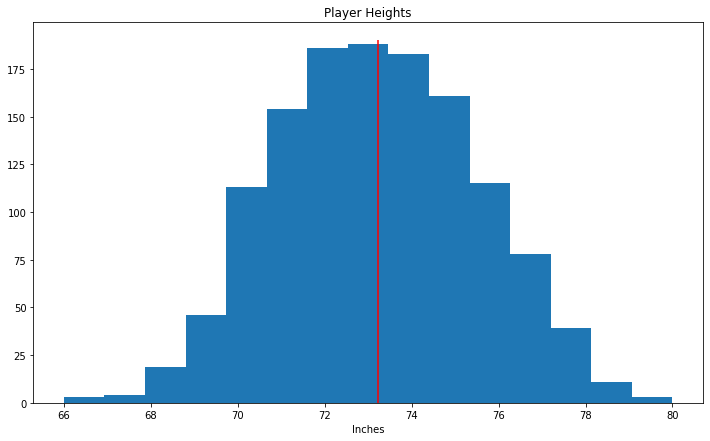

In [28]:
plt.figure(figsize = (12,7))
plt.hist(df_player['height'], bins = 15)
plt.vlines(x = np.mean(df_player['height']), ymin = 0, ymax = 190, color = 'red')
plt.xlabel('Inches')
plt.title('Player Heights');

# Player Weight

[Top Page](#Table-of-Contents)

In [29]:
df_player['weight'].describe()

count    1303.000000
mean      222.537222
std        29.476747
min       159.000000
25%       200.000000
50%       216.000000
75%       242.000000
max       352.000000
Name: weight, dtype: float64

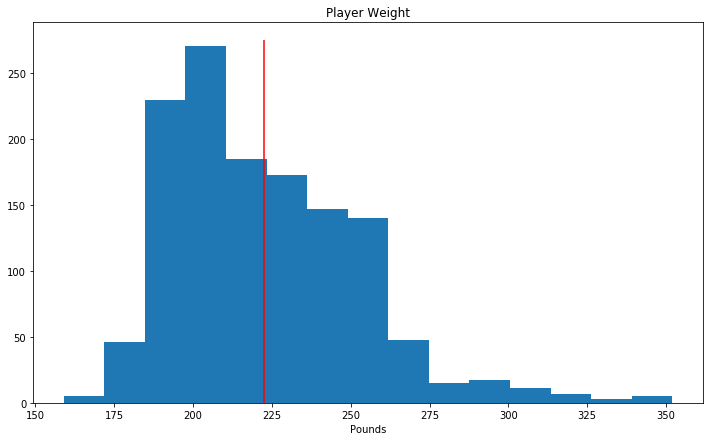

In [30]:
plt.figure(figsize = (12,7))
plt.hist(df_player['weight'], bins = 15)
plt.vlines(x = np.mean(df_player['weight']), ymin = 0, ymax = 275, color = 'red')
plt.xlabel('Pounds')
plt.title('Player Weight');

# Player's Postion 

[Top Page](#Table-of-Contents)

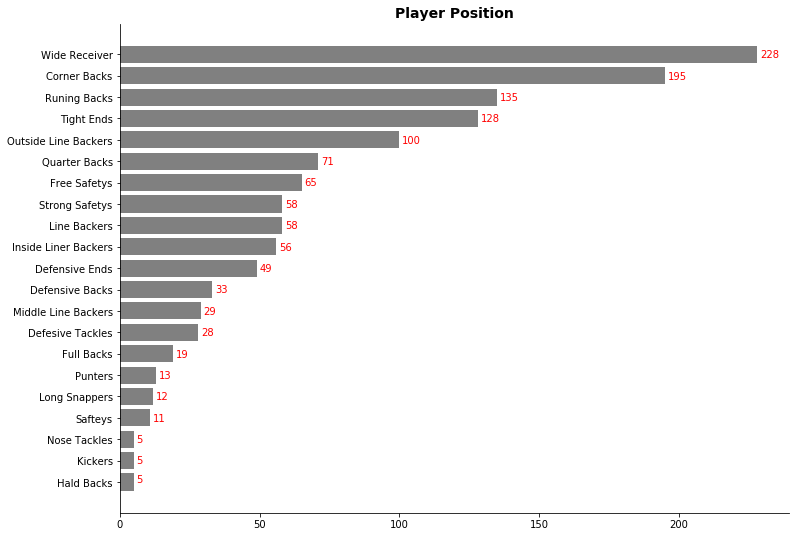

In [133]:
position = ['Wide Receiver', 'Corner Backs', 'Runing Backs', 'Tight Ends', 'Outside Line Backers', 'Quarter Backs', 'Free Safetys', 'Strong Safetys', 'Line Backers', 'Inside Liner Backers', 'Defensive Ends', 'Defensive Backs','Middle Line Backers', 'Defesive Tackles', 'Full Backs', 'Punters', 'Long Snappers', 'Safteys', 'Nose Tackles', 'Kickers', 'Hald Backs']

fig, ax = plt.subplots(figsize=(12, 9))
ax.barh(position[::-1],df_player['position'].value_counts()[::-1], color = 'grey')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.annotate(df_player['position'].value_counts()[0], xy = (229,19.85), color = 'red')
ax.annotate(df_player['position'].value_counts()[1], xy = (196,18.85), color = 'red')
ax.annotate(df_player['position'].value_counts()[2], xy = (136,17.85), color = 'red')
ax.annotate(df_player['position'].value_counts()[3], xy = (129,16.85), color = 'red')
ax.annotate(df_player['position'].value_counts()[4], xy = (101,15.85), color = 'red')
ax.annotate(df_player['position'].value_counts()[5], xy = (72,14.85), color = 'red')
ax.annotate(df_player['position'].value_counts()[6], xy = (66,13.85), color = 'red')
ax.annotate(df_player['position'].value_counts()[7], xy = (59,12.85), color = 'red')
ax.annotate(df_player['position'].value_counts()[8], xy = (59,11.85), color = 'red')
ax.annotate(df_player['position'].value_counts()[9], xy = (57,10.85), color = 'red')
ax.annotate(df_player['position'].value_counts()[10], xy = (50,9.85), color = 'red')
ax.annotate(df_player['position'].value_counts()[11], xy = (34,8.85), color = 'red')
ax.annotate(df_player['position'].value_counts()[12], xy = (30,7.85), color = 'red')
ax.annotate(df_player['position'].value_counts()[13], xy = (29,6.85), color = 'red')
ax.annotate(df_player['position'].value_counts()[14], xy = (20,5.85), color = 'red')
ax.annotate(df_player['position'].value_counts()[15], xy = (14,4.85), color = 'red')
ax.annotate(df_player['position'].value_counts()[16], xy = (13,3.85), color = 'red')
ax.annotate(df_player['position'].value_counts()[17], xy = (12,2.85), color = 'red')
ax.annotate(df_player['position'].value_counts()[18], xy = (6,1.85), color = 'red')
ax.annotate(df_player['position'].value_counts()[19], xy = (6,0.85), color = 'red')
ax.annotate(df_player['position'].value_counts()[20], xy = (6,0), color = 'red')

ax.set_title("Player Position", fontsize=14, fontweight='bold');




# Player's Age

[Top Page](#Table-of-Contents)

In [134]:
df_player['age'].describe()

count    1303.000000
mean       25.772832
std         3.263488
min        20.000000
25%        23.000000
50%        25.000000
75%        28.000000
max        41.000000
Name: age, dtype: float64

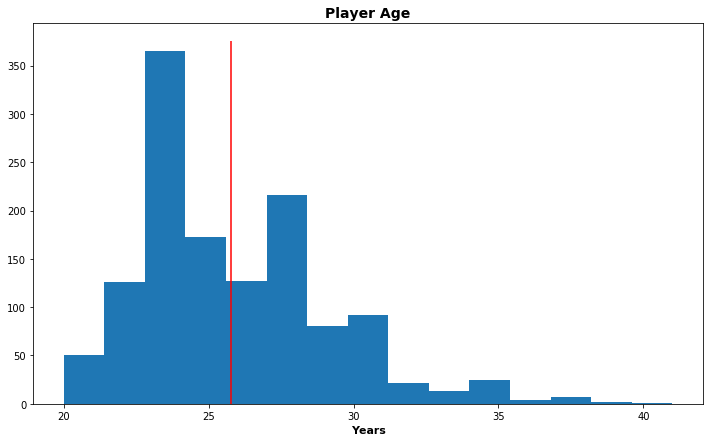

In [137]:
plt.figure(figsize = (12,7))
plt.hist(df_player['age'], bins = 15)
plt.vlines(x = np.mean(df_player['age']), ymin = 0, ymax = 375, color = 'red')
plt.xlabel('Years', fontsize=11, fontweight='bold')
plt.title('Player Age',fontsize=14, fontweight='bold');

# Defenisive players

[Top Page](#Table-of-Contents)

### Corner backs

[Top Page](#Table-of-Contents)

In [138]:
df_player[df_player['position'] == 'CB'][['height','weight','age']].describe()

,height,weight,age
count,195.000000,195.000000,195.00000
mean,71.610256,194.358974,25.54359
std,1.543826,9.112943,3.00376
min,68.000000,159.000000,21.00000
25%,71.000000,190.000000,23.00000
50%,71.000000,193.000000,25.00000
75%,73.000000,200.000000,27.00000
max,75.000000,219.000000,35.00000


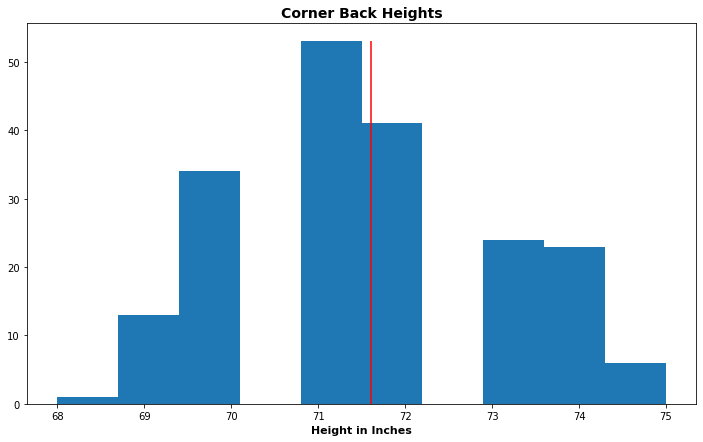

In [147]:
plt.figure(figsize = (12,7))
plt.hist(df_player[df_player['position'] == 'CB']['height'])
plt.vlines(x = np.mean(df_player[df_player['position'] == 'CB']['height']), ymin = 0, ymax = 53, color = 'red')
plt.xlabel('Height in Inches', fontsize=11, fontweight='bold')
plt.title('Corner Back Heights',fontsize=14, fontweight='bold');

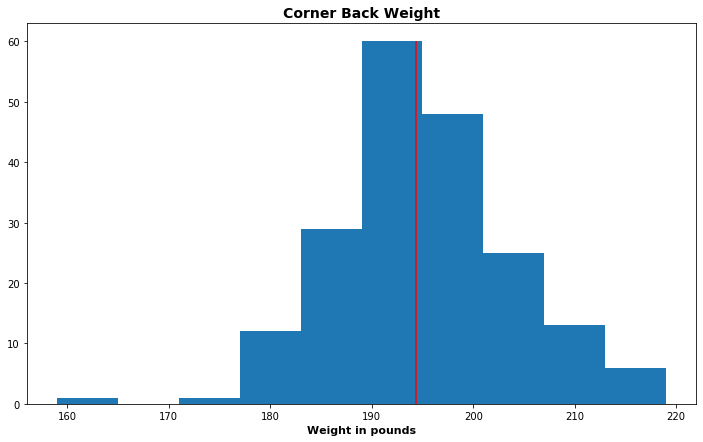

In [150]:
plt.figure(figsize = (12,7))
plt.hist(df_player[df_player['position'] == 'CB']['weight'])
plt.vlines(x = np.mean(df_player[df_player['position'] == 'CB']['weight']), ymin = 0, ymax = 60, color = 'red')
plt.xlabel('Weight in pounds', fontsize=11, fontweight='bold')
plt.title('Corner Back Weight',fontsize=14, fontweight='bold');

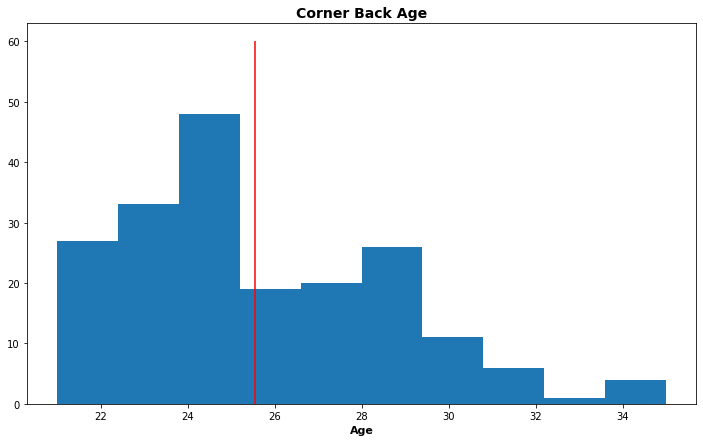

In [151]:
plt.figure(figsize = (12,7))
plt.hist(df_player[df_player['position'] == 'CB']['age'])
plt.vlines(x = np.mean(df_player[df_player['position'] == 'CB']['age']), ymin = 0, ymax = 60, color = 'red')
plt.xlabel('Age', fontsize=11, fontweight='bold')
plt.title('Corner Back Age',fontsize=14, fontweight='bold');

### Outside Line Backer

[Top Page](#Table-of-Contents)

In [152]:
df_player[df_player['position'] == 'OLB'][['height','weight','age']].describe()

,height,weight,age
count,100.000000,100.000000,100.000000
mean,74.520000,246.240000,26.510000
std,1.648262,13.801713,2.983101
min,71.000000,215.000000,20.000000
25%,73.000000,235.000000,24.000000
50%,75.000000,245.000000,26.000000
75%,76.000000,255.000000,29.000000
max,79.000000,285.000000,35.000000


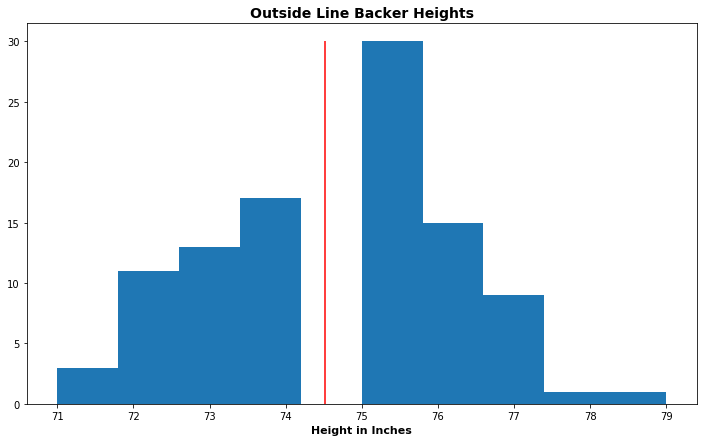

In [155]:
plt.figure(figsize = (12,7))
plt.hist(df_player[df_player['position'] == 'OLB']['height'])
plt.vlines(x = np.mean(df_player[df_player['position'] == 'OLB']['height']), ymin = 0, ymax = 30, color = 'red')
plt.xlabel('Height in Inches', fontsize=11, fontweight='bold')
plt.title('Outside Line Backer Heights',fontsize=14, fontweight='bold');

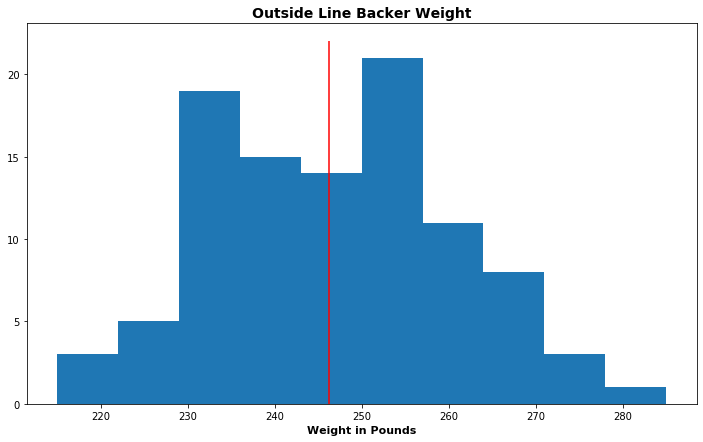

In [158]:
plt.figure(figsize = (12,7))
plt.hist(df_player[df_player['position'] == 'OLB']['weight'])
plt.vlines(x = np.mean(df_player[df_player['position'] == 'OLB']['weight']), ymin = 0, ymax = 22, color = 'red')
plt.xlabel('Weight in Pounds', fontsize=11, fontweight='bold')
plt.title('Outside Line Backer Weight',fontsize=14, fontweight='bold');

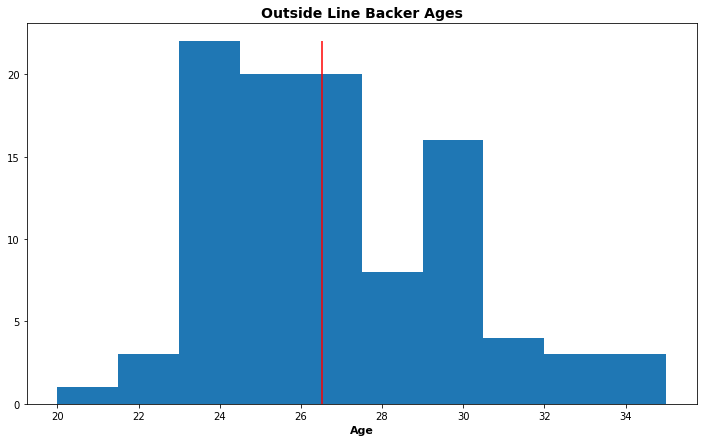

In [159]:
plt.figure(figsize = (12,7))
plt.hist(df_player[df_player['position'] == 'OLB']['age'])
plt.vlines(x = np.mean(df_player[df_player['position'] == 'OLB']['age']), ymin = 0, ymax = 22, color = 'red')
plt.xlabel('Age', fontsize=11, fontweight='bold')
plt.title('Outside Line Backer Ages',fontsize=14, fontweight='bold');

### Free Safety

[Top Page](#Table-of-Contents)

In [160]:
df_player[df_player['position'] == 'FS'][['height','weight','age']].describe()

,height,weight,age
count,65.000000,65.000000,65.000000
mean,71.861538,204.476923,26.707692
std,1.390559,8.710819,3.380658
min,68.000000,185.000000,21.000000
25%,71.000000,199.000000,24.000000
50%,72.000000,205.000000,26.000000
75%,73.000000,211.000000,29.000000
max,76.000000,227.000000,37.000000


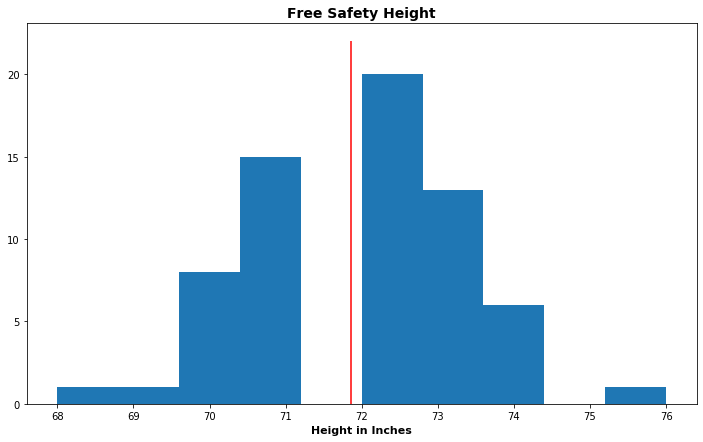

In [161]:
plt.figure(figsize = (12,7))
plt.hist(df_player[df_player['position'] == 'FS']['height'])
plt.vlines(x = np.mean(df_player[df_player['position'] == 'FS']['height']), ymin = 0, ymax = 22, color = 'red')
plt.xlabel('Height in Inches', fontsize=11, fontweight='bold')
plt.title('Free Safety Height',fontsize=14, fontweight='bold');

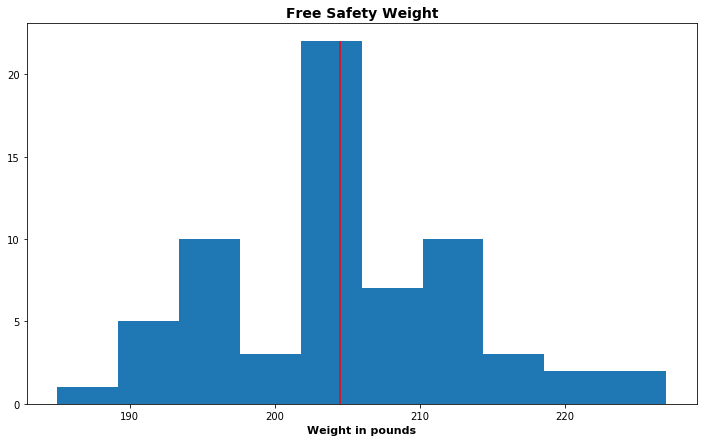

In [163]:
plt.figure(figsize = (12,7))
plt.hist(df_player[df_player['position'] == 'FS']['weight'])
plt.vlines(x = np.mean(df_player[df_player['position'] == 'FS']['weight']), ymin = 0, ymax = 22, color = 'red')
plt.xlabel('Weight in pounds', fontsize=11, fontweight='bold')
plt.title('Free Safety Weight',fontsize=14, fontweight='bold');

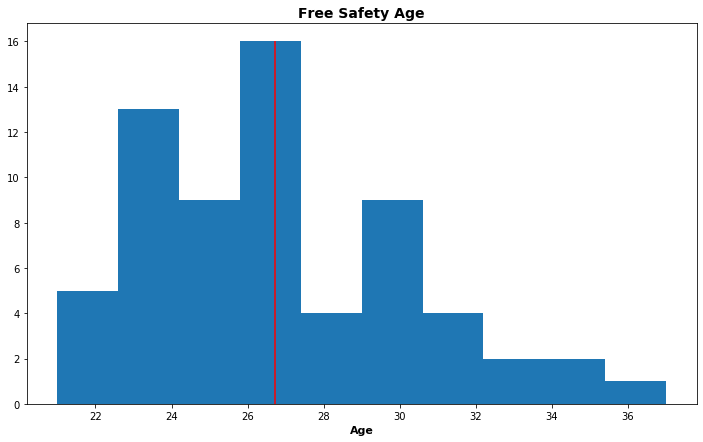

In [166]:
plt.figure(figsize = (12,7))
plt.hist(df_player[df_player['position'] == 'FS']['age'])
plt.vlines(x = np.mean(df_player[df_player['position'] == 'FS']['age']), ymin = 0, ymax = 16, color = 'red')
plt.xlabel('Age', fontsize=11, fontweight='bold')
plt.title('Free Safety Age',fontsize=14, fontweight='bold');

### Strong Safety

[Top Page](#Table-of-Contents)

In [165]:
df_player[df_player['position'] == 'SS'][['height','weight','age']].describe()

,height,weight,age
count,58.000000,58.000000,58.000000
mean,72.017241,207.172414,26.155172
std,1.538869,8.115694,2.539524
min,69.000000,186.000000,21.000000
25%,71.000000,202.000000,24.000000
50%,72.000000,208.500000,26.000000
75%,73.000000,213.750000,28.000000
max,76.000000,220.000000,31.000000


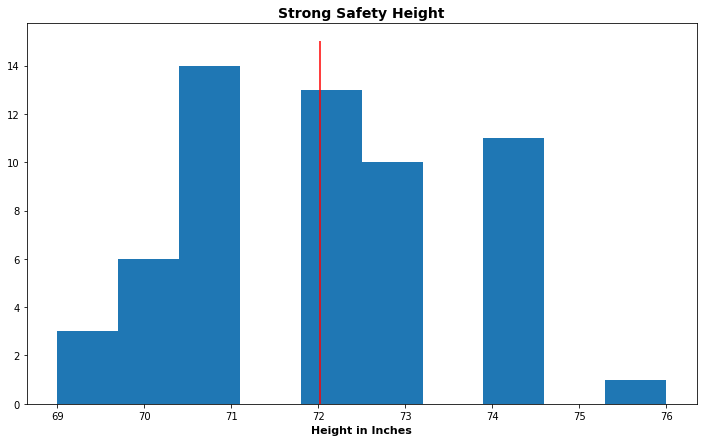

In [171]:
plt.figure(figsize = (12,7))
plt.hist(df_player[df_player['position'] == 'SS']['height'])
plt.vlines(x = np.mean(df_player[df_player['position'] == 'SS']['height']), ymin = 0, ymax = 15, color = 'red')
plt.xlabel('Height in Inches', fontsize=11, fontweight='bold')
plt.title('Strong Safety Height',fontsize=14, fontweight='bold');

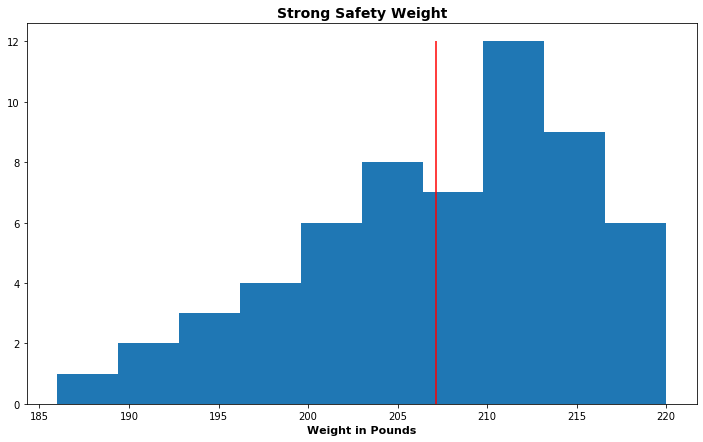

In [169]:
plt.figure(figsize = (12,7))
plt.hist(df_player[df_player['position'] == 'SS']['weight'])
plt.vlines(x = np.mean(df_player[df_player['position'] == 'SS']['weight']), ymin = 0, ymax = 12, color = 'red')
plt.xlabel('Weight in Pounds', fontsize=11, fontweight='bold')
plt.title('Strong Safety Weight',fontsize=14, fontweight='bold');

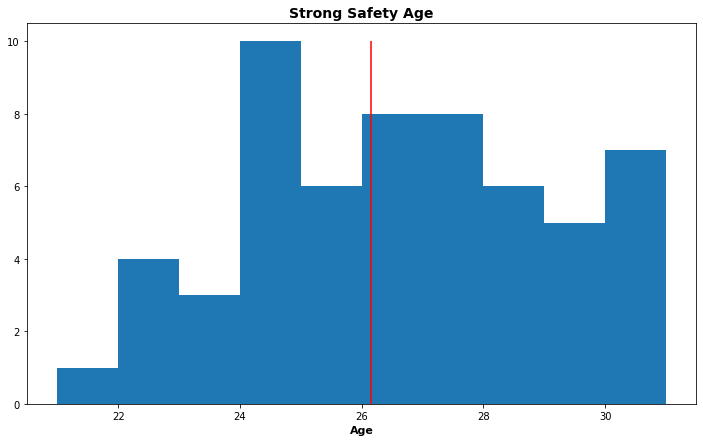

In [173]:
plt.figure(figsize = (12,7))
plt.hist(df_player[df_player['position'] == 'SS']['age'])
plt.vlines(x = np.mean(df_player[df_player['position'] == 'SS']['age']), ymin = 0, ymax = 10, color = 'red')
plt.xlabel('Age', fontsize=11, fontweight='bold')
plt.title('Strong Safety Age',fontsize=14, fontweight='bold');

### Line Backer

[Top Page](#Table-of-Contents)

In [174]:
df_player[df_player['position'] == 'LB'][['height','weight','age']].describe()

,height,weight,age
count,58.000000,58.000000,58.000000
mean,73.982759,239.775862,23.034483
std,1.290877,14.155828,1.653975
min,72.000000,214.000000,20.000000
25%,73.000000,230.000000,22.000000
50%,74.000000,237.000000,23.000000
75%,75.000000,250.000000,24.000000
max,77.000000,285.000000,30.000000


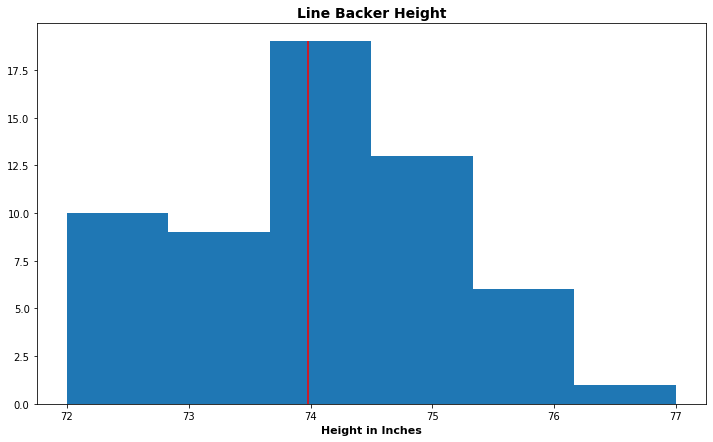

In [183]:
plt.figure(figsize = (12,7))
plt.hist(df_player[df_player['position'] == 'LB']['height'], bins=6)
plt.vlines(x = np.mean(df_player[df_player['position'] == 'LB']['height']), ymin = 0, ymax = 19, color = 'red')
plt.xlabel('Height in Inches', fontsize=11, fontweight='bold')
plt.title('Line Backer Height',fontsize=14, fontweight='bold');

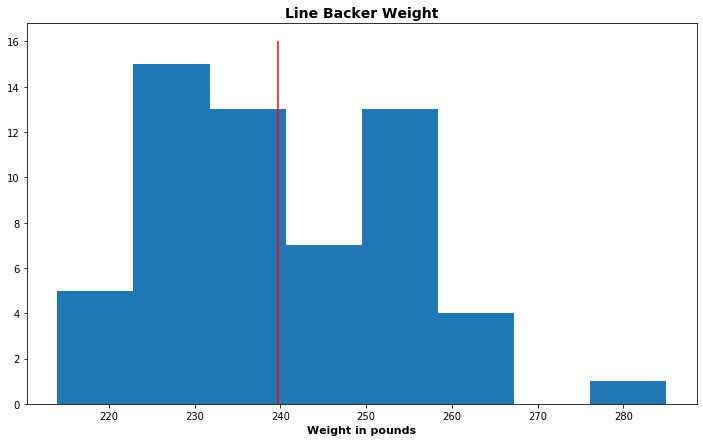

In [187]:
plt.figure(figsize = (12,7))
plt.hist(df_player[df_player['position'] == 'LB']['weight'], bins=8)
plt.vlines(x = np.mean(df_player[df_player['position'] == 'LB']['weight']), ymin = 0, ymax = 16, color = 'red')
plt.xlabel('Weight in pounds', fontsize=11, fontweight='bold')
plt.title('Line Backer Weight',fontsize=14, fontweight='bold');

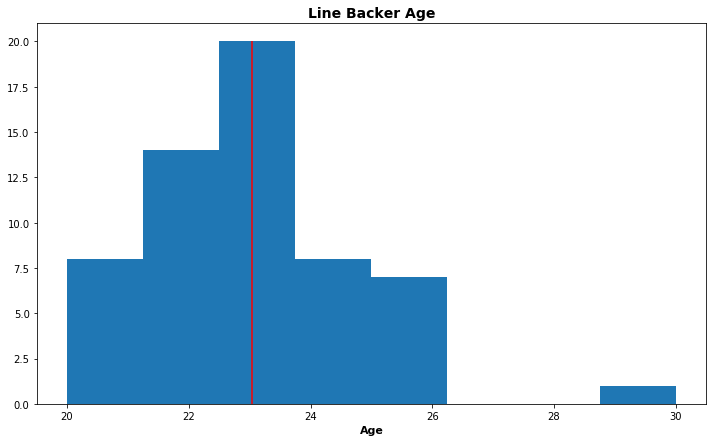

In [189]:
plt.figure(figsize = (12,7))
plt.hist(df_player[df_player['position'] == 'LB']['age'], bins=8)
plt.vlines(x = np.mean(df_player[df_player['position'] == 'LB']['age']), ymin = 0, ymax = 20, color = 'red')
plt.xlabel('Age', fontsize=11, fontweight='bold')
plt.title('Line Backer Age',fontsize=14, fontweight='bold');

### Inside line backer

[Top Page](#Table-of-Contents)

In [ ]:
df_player[df_player['position'] == 'ILB'][['height','weight','age']].describe()

In [ ]:
df_player[df_player['position'] == 'ILB'][['height','weight','age']].hist();

In [ ]:
df_player[df_player['position'] == 'ILB'][['height','weight','age']].plot.scatter(x='weight', y='height');

### Defensive end

[Top Page](#Table-of-Contents)

In [ ]:
df_player[df_player['position'] == 'DE'][['height','weight','age']].describe()

In [ ]:
df_player[df_player['position'] == 'DE'][['height','weight','age']].hist();

In [ ]:
df_player[df_player['position'] == 'DE'][['height','weight','age']].plot.scatter(x='weight', y='height');

### Defensive back

[Top Page](#Table-of-Contents)

In [ ]:
df_player[df_player['position'] == 'DB'][['height','weight','age']].describe()

In [ ]:
df_player[df_player['position'] == 'DB'][['height','weight','age']].hist();

In [ ]:
df_player[df_player['position'] == 'DB'][['height','weight','age']].plot.scatter(x='weight', y='height');

### Middle Line Backer

[Top Page](#Table-of-Contents)

In [ ]:
df_player[df_player['position'] == 'MLB'][['height','weight','age']].describe()

In [ ]:
df_player[df_player['position'] == 'MLB'][['height','weight','age']].hist();

In [ ]:
df_player[df_player['position'] == 'CB'][['height','weight','age']].plot.scatter(x='weight', y='height');

### Defenive tackle

[Top Page](#Table-of-Contents)

In [ ]:
df_player[df_player['position'] == 'DT'][['height','weight','age']].describe()

In [ ]:
df_player[df_player['position'] == 'DT'][['height','weight','age']].hist();

In [ ]:
df_player[df_player['position'] == 'CB'][['height','weight','age']].plot.scatter(x='weight', y='height');

### Nose tackle

[Top Page](#Table-of-Contents)

In [ ]:
df_player[df_player['position'] == 'NT'][['height','weight','age']].describe()

In [ ]:
df_player[df_player['position'] == 'NT'][['height','weight','age']].hist();

In [ ]:
df_player[df_player['position'] == 'NT'][['height','weight','age']].plot.scatter(x='weight', y='height');

# Offensive Players

[Top Page](#Table-of-Contents)

### Wide Recievers

[Top Page](#Table-of-Contents)

In [ ]:
df_player[df_player['position'] == 'WR'][['height','weight','age']].describe()

In [ ]:
df_player[df_player['position'] == 'WR'][['height','weight','age']].hist();

In [ ]:
df_player[df_player['position'] == 'WR'][['height','weight','age']].plot.scatter(x='weight', y='height');

### Running backs

[Top Page](#Table-of-Contents)

In [ ]:
df_player[df_player['position'] == 'RB'][['height','weight','age']].describe()

In [ ]:
df_player[df_player['position'] == 'RB'][['height','weight','age']].hist();

In [ ]:
df_player[df_player['position'] == 'RB'][['height','weight','age']].plot.scatter(x='weight', y='height');

### Tight End

[Top Page](#Table-of-Contents)

In [ ]:
df_player[df_player['position'] == 'TE'][['height','weight','age']].describe()

In [ ]:
df_player[df_player['position'] == 'TE'][['height','weight','age']].hist();

In [ ]:
df_player[df_player['position'] == 'TE'][['height','weight','age']].plot.scatter(x='weight', y='height');

### Quarter Back

[Top Page](#Table-of-Contents)

In [ ]:
df_player[df_player['position'] == 'QB'][['height','weight','age']].describe()

In [ ]:
df_player[df_player['position'] == 'QB'][['height','weight','age']].hist();

In [ ]:
df_player[df_player['position'] == 'QB'][['height','weight','age']].plot.scatter(x='weight', y='height');

### Full Back

[Top Page](#Table-of-Contents)

In [ ]:
df_player[df_player['position'] == 'FB'][['height','weight','age']].describe()

In [ ]:
df_player[df_player['position'] == 'FB'][['height','weight','age']].hist();

In [ ]:
df_player[df_player['position'] == 'FB'][['height','weight','age']].plot.scatter(x='weight', y='height');

### Punter

[Top Page](#Table-of-Contents)

In [ ]:
df_player[df_player['position'] == 'P'][['height','weight','age']].describe()

In [ ]:
df_player[df_player['position'] == 'P'][['height','weight','age']].hist();

In [ ]:
df_player[df_player['position'] == 'P'][['height','weight','age']].plot.scatter(x='weight', y='height');

### Kicker

[Top Page](#Table-of-Contents)

In [ ]:
df_player[df_player['position'] == 'K'][['height','weight','age']].describe()

In [ ]:
df_player[df_player['position'] == 'K'][['height','weight','age']].hist();

In [ ]:
df_player[df_player['position'] == 'K'][['height','weight','age']].plot.scatter(x='weight', y='height');

### Half Back

[Top Page](#Table-of-Contents)

In [ ]:
df_player[df_player['position'] == 'HB'][['height','weight','age']].describe()

In [ ]:
df_player[df_player['position'] == 'HB'][['height','weight','age']].hist();

In [ ]:
df_player[df_player['position'] == 'HB'][['height','weight','age']].plot.scatter(x='weight', y='height');

# Games Data

[Top Page](#Table-of-Contents)

In [ ]:
df_games = pd.read_csv('../data/games.csv')

In [ ]:
df_games.shape

In [ ]:
df_games.head()

In [ ]:
df_games.tail()

In [ ]:
#weekly counts of games
# Week 1 is missing games
df_games['week'].value_counts()

### Week 1 

[Top Page](#Table-of-Contents)

In [ ]:
df_games[df_games['week'] == 1]

### Week 2

[Top Page](#Table-of-Contents)

In [ ]:
df_games[df_games['week'] == 2]

### Week 3

[Top Page](#Table-of-Contents)

In [ ]:
df_games[df_games['week'] == 3]

### Week 4

[Top Page](#Table-of-Contents)

In [ ]:
df_games[df_games['week'] == 4]

### Week 5

[Top Page](#Table-of-Contents)

In [ ]:
df_games[df_games['week'] == 5]

### Week 6

[Top Page](#Table-of-Contents)

In [ ]:
df_games[df_games['week'] == 6]

### Week 7

[Top Page](#Table-of-Contents)

In [ ]:
df_games[df_games['week'] == 7]

### Week 8

[Top Page](#Table-of-Contents)

In [ ]:
df_games[df_games['week'] == 8]

### Week 9

[Top Page](#Table-of-Contents)

In [ ]:
df_games[df_games['week'] == 9]

### Week 10

[Top Page](#Table-of-Contents)

In [ ]:
df_games[df_games['week'] == 10]

### Week 11

[Top Page](#Table-of-Contents)

In [ ]:
df_games[df_games['week'] == 11]

### Week 12

[Top Page](#Table-of-Contents)

In [ ]:
df_games[df_games['week'] == 12]

### Week 13

[Top Page](#Table-of-Contents)

In [ ]:
df_games[df_games['week'] == 13]

### Week 14

[Top Page](#Table-of-Contents)

In [ ]:
df_games[df_games['week'] == 14]

### Week 15

[Top Page](#Table-of-Contents)

In [ ]:
df_games[df_games['week'] == 15]

### Week 16

[Top Page](#Table-of-Contents)

In [ ]:
df_games[df_games['week'] == 16]

### Week 17

[Top Page](#Table-of-Contents)

In [ ]:
df_games[df_games['week'] == 17]

# Plays Data

[Top Page](#Table-of-Contents)

In [ ]:
df_plays = pd.read_csv('../data/plays.csv')

In [ ]:
df_plays.shape

In [ ]:
df_plays.columns

In [ ]:
df_plays.head()

In [ ]:
df_plays['down'].value_counts()

In [ ]:
df_plays['yardsToGo'].value_counts().hist();

In [ ]:
df_plays['playType'].value_counts()

In [ ]:
df_plays['yardlineSide'].value_counts()

In [ ]:
df_plays['yardlineNumber'].value_counts().sort_index()

In [ ]:
df_plays['offenseFormation'].value_counts()

In [ ]:
df_plays['personnelO'].value_counts()

In [ ]:
df_plays['defendersInTheBox'].value_counts()

In [ ]:
df_plays['numberOfPassRushers'].value_counts()

In [ ]:
df_plays['personnelD'].value_counts()

In [ ]:
df_plays['typeDropback'].value_counts()

In [ ]:
df_plays['preSnapVisitorScore'].value_counts().hist();

In [ ]:
df_plays['preSnapHomeScore'].value_counts().hist();

In [ ]:
df_plays['absoluteYardlineNumber'].value_counts().sort_index().hist();

In [ ]:
df_plays['gameClock'].value_counts()

In [ ]:
df_plays['penaltyCodes'].value_counts()

In [ ]:
df_plays['passResult'].value_counts().hist();

In [ ]:
df_plays['offensePlayResult'].value_counts().sort_index().hist(bins=100);

In [ ]:
df_plays['playResult'].value_counts().sort_index().hist(bins=100);

In [ ]:
df_plays['epa'].value_counts()

In [ ]:
df_plays['isDefensivePI'].value_counts()

# Tracking Data

[Top Page](#Table-of-Contents)

# Week 1 Data

[Top Page](#Table-of-Contents)

In [ ]:
# Week 1 Data
df_week1 = pd.read_csv('../data/week1.csv')

In [ ]:
df_week1[(df_week1['frameId'] == 1) & (df_week1['gameId'] == 2018090600)]

# Week 2 Data

[Top Page](#Table-of-Contents)

In [ ]:
# Week 2 Data
df_week2 = pd.read_csv('../data/week2.csv')

# Week 3 Data 

[Top Page](#Table-of-Contents)

In [ ]:
# Week 3 data
df_week3 = pd.read_csv('../data/week3.csv')

# Week 4 Data

[Top Page](#Table-of-Contents)

In [ ]:
#Week 4 Data
df_week4 = pd.read_csv('../data/week4.csv')

# Week 5 Data

[Top Page](#Table-of-Contents)

In [ ]:
#Week 5 Data
df_week5 = pd.read_csv('../data/week5.csv')

# Week 6 Data

[Top Page](#Table-of-Contents)

In [ ]:
#Week 6 Data
df_week6 = pd.read_csv('../data/week6.csv')

# Week 7 Data

[Top Page](#Table-of-Contents)

In [ ]:
#Week 7 Data
df_week7 = pd.read_csv('../data/week7.csv')

# Week 8 Data

[Top Page](#Table-of-Contents)

In [ ]:
#Week 8 Data
df_week8 = pd.read_csv('../data/week8.csv')

# Week 9 Data

[Top Page](#Table-of-Contents)

In [ ]:
#Week 9 Data
df_week9 = pd.read_csv('../data/week9.csv')

# Week 10 Data

[Top Page](#Table-of-Contents)

In [ ]:
#Week 10 Data
df_week10 = pd.read_csv('../data/week10.csv')

# Week 11 Data

[Top Page](#Table-of-Contents)

In [ ]:
#Week 11 Data
df_week11 = pd.read_csv('../data/week11.csv')

# Week 12 Data

[Top Page](#Table-of-Contents)

In [ ]:
#Week 12 Data
df_week12 = pd.read_csv('../data/week12.csv')

# Week 13 Data

[Top Page](#Table-of-Contents)

In [ ]:
#Week 13 Data
df_week13 = pd.read_csv('../data/week13.csv')

# Week 14 Data

[Top Page](#Table-of-Contents)

In [ ]:
#Week 14 Data
df_week14 = pd.read_csv('../data/week14.csv')

# Week 15 Data

[Top Page](#Table-of-Contents)

In [ ]:
#Week 15 Data
df_week15 = pd.read_csv('../data/week15.csv')

# Week 16 Data

[Top Page](#Table-of-Contents)

In [ ]:
#Week 16 Data
df_week16 = pd.read_csv('../data/week16.csv')

# Week 17 Data

[Top Page](#Table-of-Contents)

In [ ]:
#Week 17 Data
df_week17 = pd.read_csv('../data/week17.csv')